In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
filepath = "../dados/Exportacoes/exportacao_AM.csv"
filepath_muncode = "../dados/Producao/PAM.xlsx"

In [3]:
df = pd.read_csv(filepath)

In [4]:
df_mun = pd.read_excel(filepath_muncode, sheet_name = "Variáveis externas")

In [5]:
df.loc[:, ['Nome_Município']] = df['city'].apply(lambda x: x[:-5])
df.loc[:, ['estado']] = df['city'].apply(lambda x: x[-2:])

In [6]:
df.head()

,year,month,country,city,sh4_code,sh4_desc,sh2_code,sh2_desc,economic_block,usd,net_weight,Nome_Município,estado
0,2010,1,Albania,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spices",Europe,39750,15000,Castanhal,PA
1,2010,1,Algeria,Araguaína - TO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),1250675,395681,Araguaína,TO
2,2010,1,Algeria,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spices",Africa (minus MIDDLE EAST),74103,28000,Castanhal,PA
3,2010,1,Algeria,Vilhena - RO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),351563,125064,Vilhena,RO
4,2010,1,Angola,Ariquemes - RO,9406,Prefabricated buildings,94,"Furniture; bedding, mattresses, cushions and s...",Africa (minus MIDDLE EAST),50000,37600,Ariquemes,RO


In [7]:
df.shape

(495820, 13)

In [8]:
df_mun = df_mun.loc[:,['Código Município Completo', 'Nome_Município']]

In [9]:
df_mun.head()

,Código Município Completo,Nome_Município
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes


In [10]:
df = df.merge(df_mun, how="left", on="Nome_Município")

In [11]:
df.isnull().sum()

year                           0
month                          0
country                        0
city                           0
sh4_code                       0
sh4_desc                       0
sh2_code                       0
sh2_desc                       0
economic_block                 0
usd                            0
net_weight                     0
Nome_Município                 0
estado                         0
Código Município Completo    670
dtype: int64

# Analise exploratoria (EDA)

In [12]:
df.columns

Index(['year', 'month', 'country', 'city', 'sh4_code', 'sh4_desc', 'sh2_code',
       'sh2_desc', 'economic_block', 'usd', 'net_weight', 'Nome_Município',
       'estado', 'Código Município Completo'],
      dtype='object')

In [13]:
df.head(20)

,year,month,country,city,sh4_code,sh4_desc,sh2_code,sh2_desc,economic_block,usd,net_weight,Nome_Município,estado,Código Município Completo
0,2010,1,Albania,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spices",Europe,39750,15000,Castanhal,PA,1502400.0
1,2010,1,Algeria,Araguaína - TO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),1250675,395681,Araguaína,TO,1702109.0
2,2010,1,Algeria,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spices",Africa (minus MIDDLE EAST),74103,28000,Castanhal,PA,1502400.0
3,2010,1,Algeria,Vilhena - RO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),351563,125064,Vilhena,RO,1100304.0
4,2010,1,Angola,Ariquemes - RO,9406,Prefabricated buildings,94,"Furniture; bedding, mattresses, cushions and s...",Africa (minus MIDDLE EAST),50000,37600,Ariquemes,RO,1100023.0
5,2010,1,Angola,Barra do Garças - MT,202,"Meat of bovine animals, frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),201820,75056,Barra do Garças,MT,5101803.0
6,2010,1,Bolivia,Brasiléia - AC,1006,Rice,10,Cereals,Andean Community,141169,213000,Brasiléia,AC,1200104.0
7,2010,1,Angola,Manaus - AM,8711,Motor-cycles (including mopeds) and cycles fit...,87,Vehicles other than railway or tramway rolling...,Africa (minus MIDDLE EAST),201946,11164,Manaus,AM,1302603.0
8,2010,1,Angola,Rondonópolis - MT,203,"Meat of swine, fresh, chilled or frozen",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),327502,156339,Rondonópolis,MT,5107602.0
9,2010,1,Angola,Rondonópolis - MT,206,"Edible offal of bovine animals, swine, sheep, ...",2,Meat and edible meat offal,Africa (minus MIDDLE EAST),53953,21516,Rondonópolis,MT,5107602.0


In [14]:
# df.loc[:,['date']] = pd.date_range(start='2010-01', end='2021-01', freq='M')

In [15]:
len(df.sh4_code.unique()), len(df.sh4_desc.unique())

(1008, 1008)

In [16]:
len(df.sh2_code.unique()), len(df.sh2_code.unique())

(96, 96)

In [17]:
len(df.city.unique())

346

In [18]:
list(df.city.unique())

['Castanhal - PA',
 'Araguaína - TO',
 'Vilhena - RO',
 'Ariquemes - RO',
 'Barra do Garças - MT',
 'Brasiléia - AC',
 'Manaus - AM',
 'Rondonópolis - MT',
 'Sinop - MT',
 'Belém - PA',
 'Ananindeua - PA',
 'Aripuanã - MT',
 'Balsas - MA',
 'Cuiabá - MT',
 'Ji-Paraná - RO',
 'São Luís - MA',
 'Poxoréo - MT',
 'Santana - AP',
 'Sapezal - MT',
 'Tomé-Açu - PA',
 'Araputanga - MT',
 'Candeias do Jamari - RO',
 'Oriximiná - PA',
 'Ponte Alta do Tocantins - TO',
 'Santarém - PA',
 'Pedra Branca do Amapari - AP',
 'Santa Rita do Trivelato - MT',
 'Almeirim - PA',
 'Alta Floresta - MT',
 'Anapu - PA',
 'Barcarena - PA',
 'Breves - PA',
 'Cotriguaçu - MT',
 'Juína - MT',
 'Marituba - PA',
 'Medicilândia - PA',
 'Porto de Moz - PA',
 'Prainha - PA',
 'São José do Rio Claro - MT',
 'Senador José Porfírio - PA',
 'Uruará - PA',
 'Cáceres - MT',
 'Epitaciolândia - AC',
 'Guajará-Mirim - RO',
 'Nobres - MT',
 'Porto Velho - RO',
 'Várzea Grande - MT',
 'Bragança - PA',
 'Paranaíta - MT',
 'Altamira

# Exportacoes em funcao do tempo: usd e net weight

In [19]:
monthly = df.groupby(by=["year", "month"]).sum()

In [20]:
monthly.loc[:,['date']] = pd.date_range(start='2010-01', end='2021-01', freq='M')

In [21]:
monthly.head()

sh4_code  sh2_code         usd   net_weight  \
year month                                                
2010 1      10252013    102253  1591104104  12889081605   
     2      11063091    110346  1922684400  11387583645   
     3      12494148    124614  2558888629  16630160113   
     4      13209642    131754  2477672024  12227367534   
     5      12435102    124028  2763998300  13312367481   

            Código Município Completo       date  
year month                                        
2010 1                   5.615047e+09 2010-01-31  
     2                   6.144886e+09 2010-02-28  
     3                   6.884283e+09 2010-03-31  
     4                   7.103425e+09 2010-04-30  
     5                   6.708893e+09 2010-05-31

In [22]:
pd.melt(monthly, ['date']).query("variable == 'usd' | variable == 'net_weight'").head()

,date,variable,value
264,2010-01-31,usd,1.591104e+09
265,2010-02-28,usd,1.922684e+09
266,2010-03-31,usd,2.558889e+09
267,2010-04-30,usd,2.477672e+09
268,2010-05-31,usd,2.763998e+09


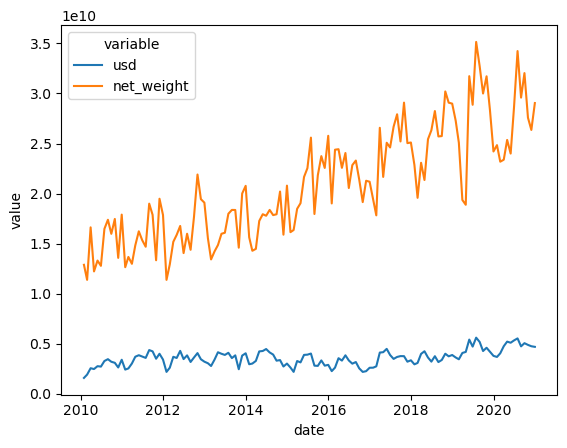

In [23]:
sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(monthly, ['date']).query("variable == 'usd' | variable == 'net_weight'"))

plt.show()

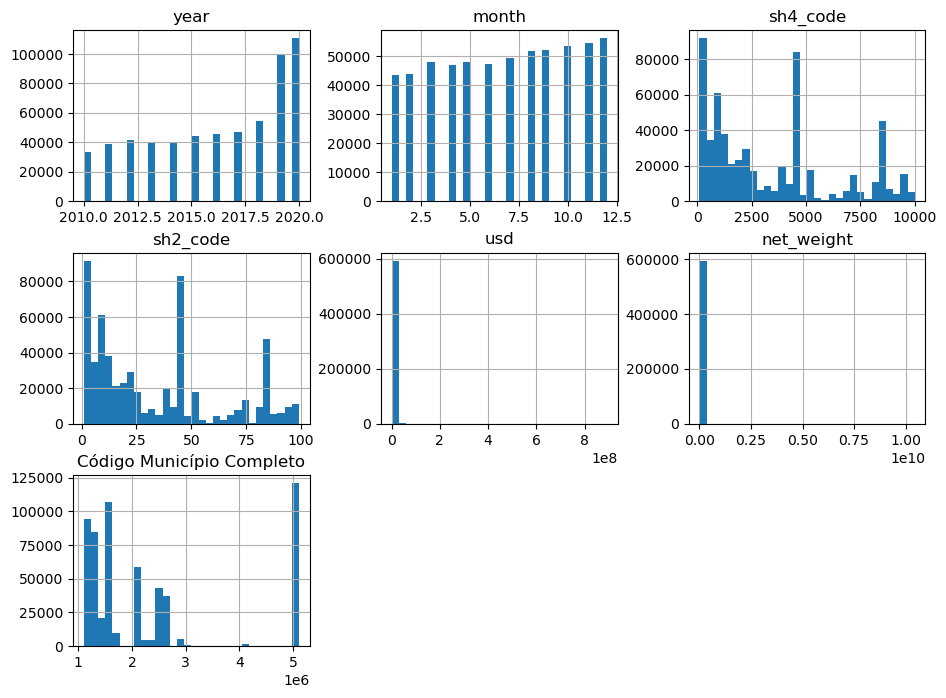

In [24]:
df.hist(bins=30, figsize=(11, 8))

# plt.figure(figsize=(20,100))

plt.show();

# Tipos de produtos mais exportados

In [25]:
df.groupby(by=["sh4_code"]).sum().sort_values(by=['usd'], ascending=False).reset_index(level=0).head()

,sh4_code,year,month,sh2_code,usd,net_weight,Código Município Completo
0,2601,9645646,30773,124410,122986780075,1870970686331,7.368371e+09
1,1201,55052962,159313,327756,99959374357,245067340143,1.094268e+11
2,1005,56272685,219278,279120,35503802233,194555483200,1.291133e+11
3,2304,14515892,47341,165669,34189725186,82357463645,3.432242e+10
4,2818,2980009,9719,41412,26850495774,93263486784,2.650155e+09


In [26]:
def plot_product_types(df=df, p_code="sh4_code", y="net_weight", n_values=20):
    '''
    This function plots the quantity of imported products in usd or weight
    '''
    # let's cut the desc columns, so the visuals look cleaner
    
    df.loc[:, ['sh2_desc']] = df['sh2_desc'].apply(lambda x: x[:25])
    
    # here we define and order the values we want to plot
    imp_w = df.groupby(by=[p_code]).sum().sort_values(by=[y], ascending=False).reset_index(level=0).head(n_values)
    # then we plot them
    ax = imp_w.plot(x=p_code, y=y, kind="bar", figsize=(17, 4))

    plt.show()

## codigo de produtos: sh4

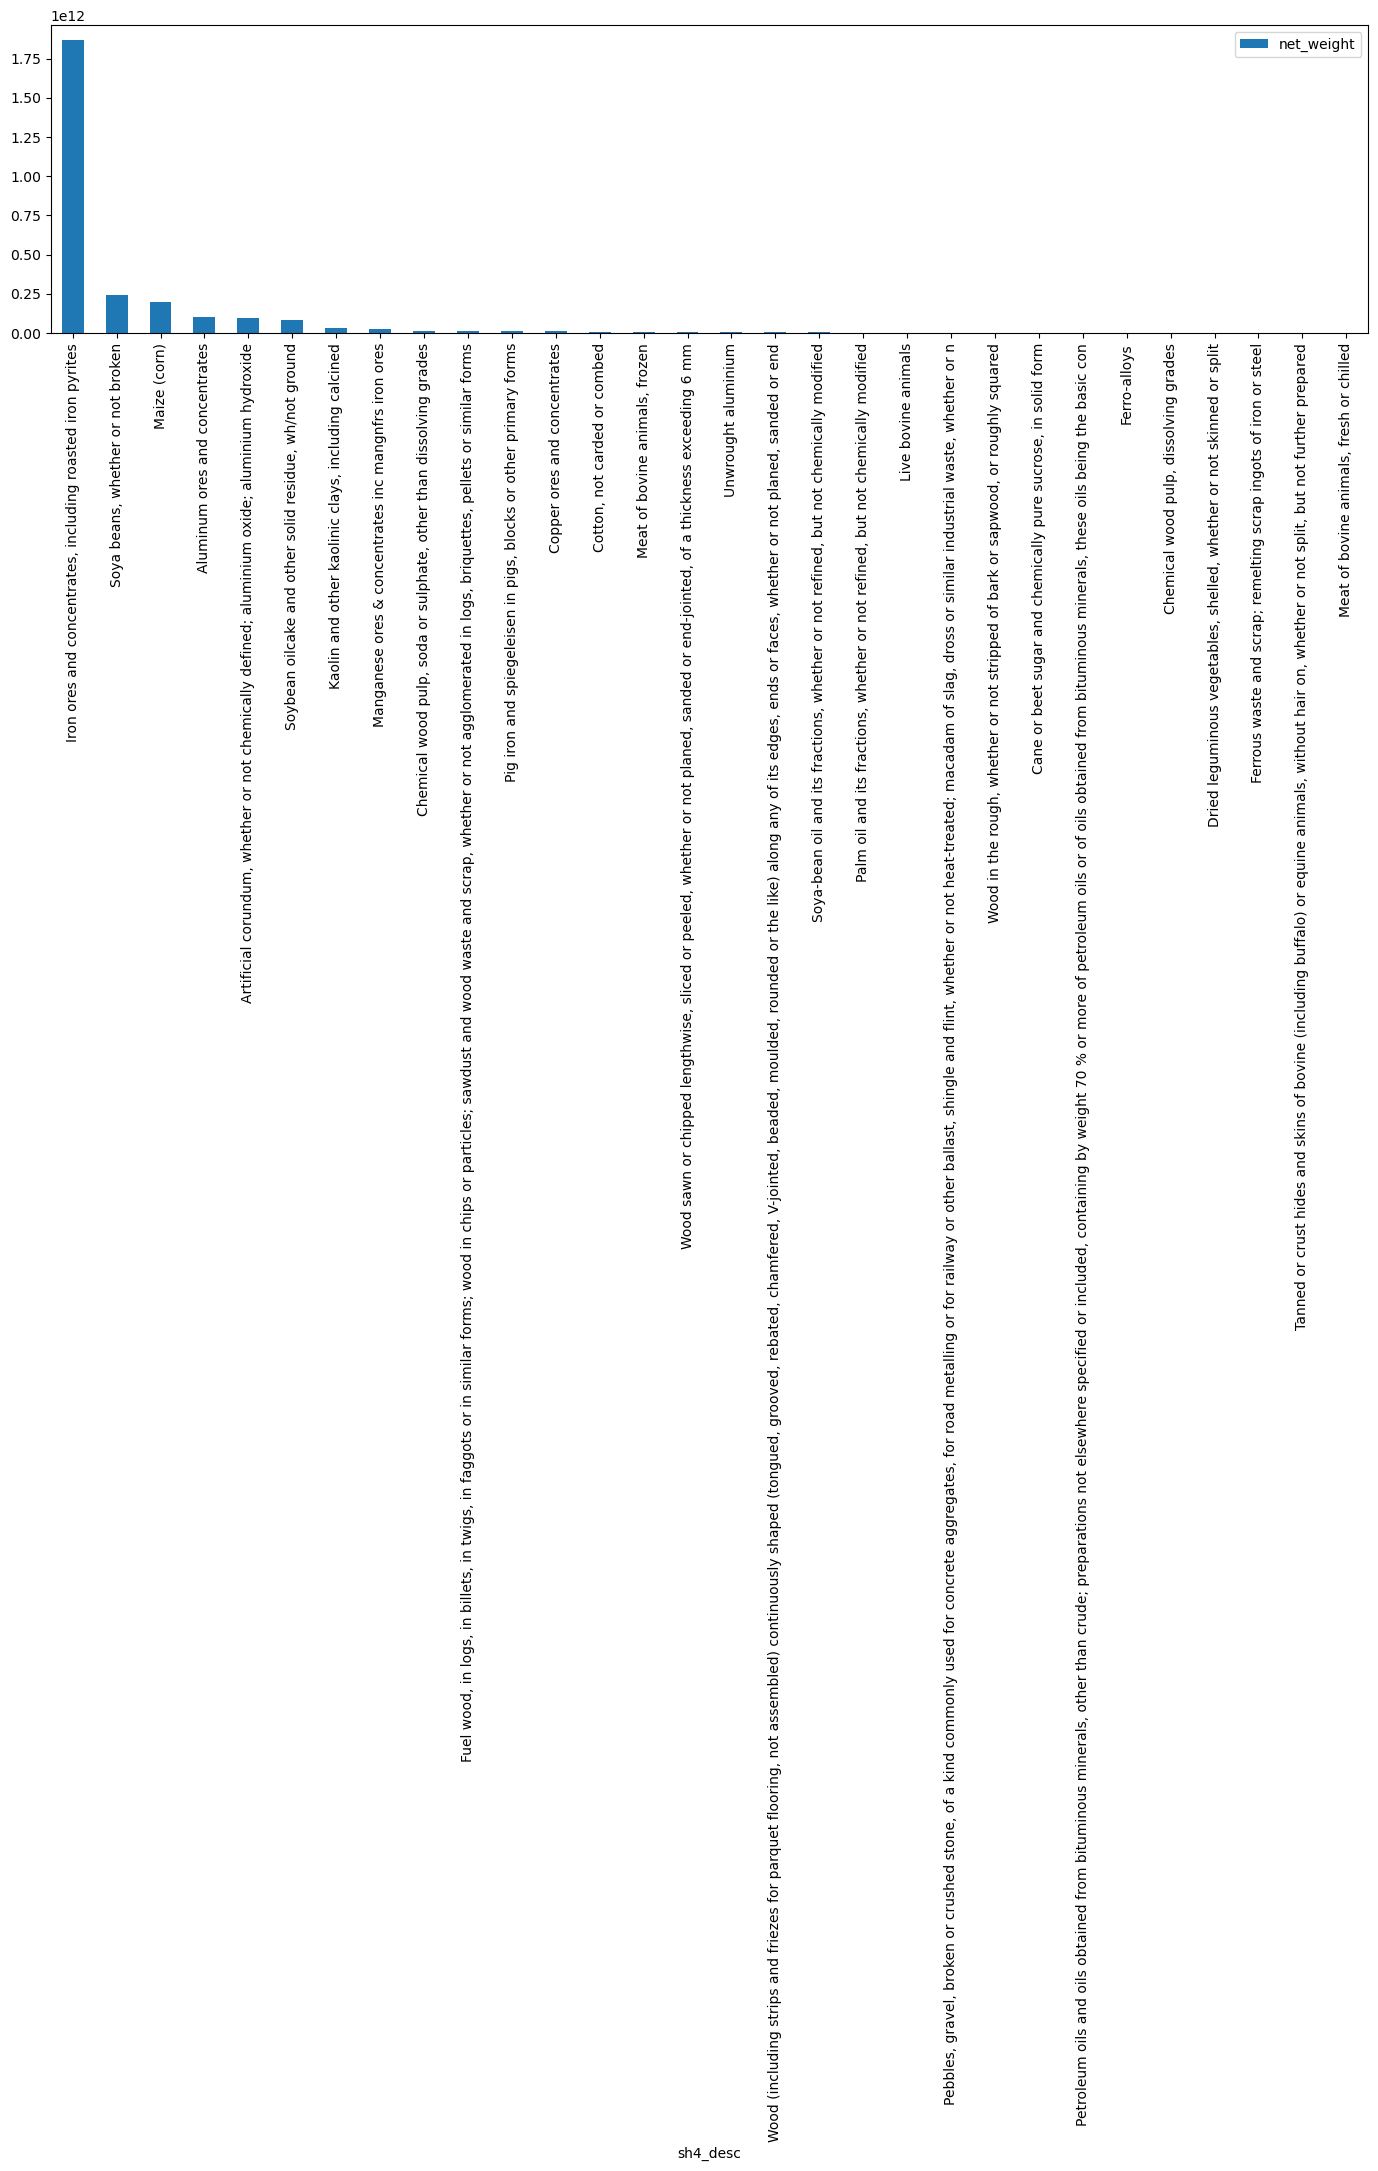

In [27]:
# most imported products by weight
plot_product_types(df=df, p_code="sh4_desc", y="net_weight", n_values=30)

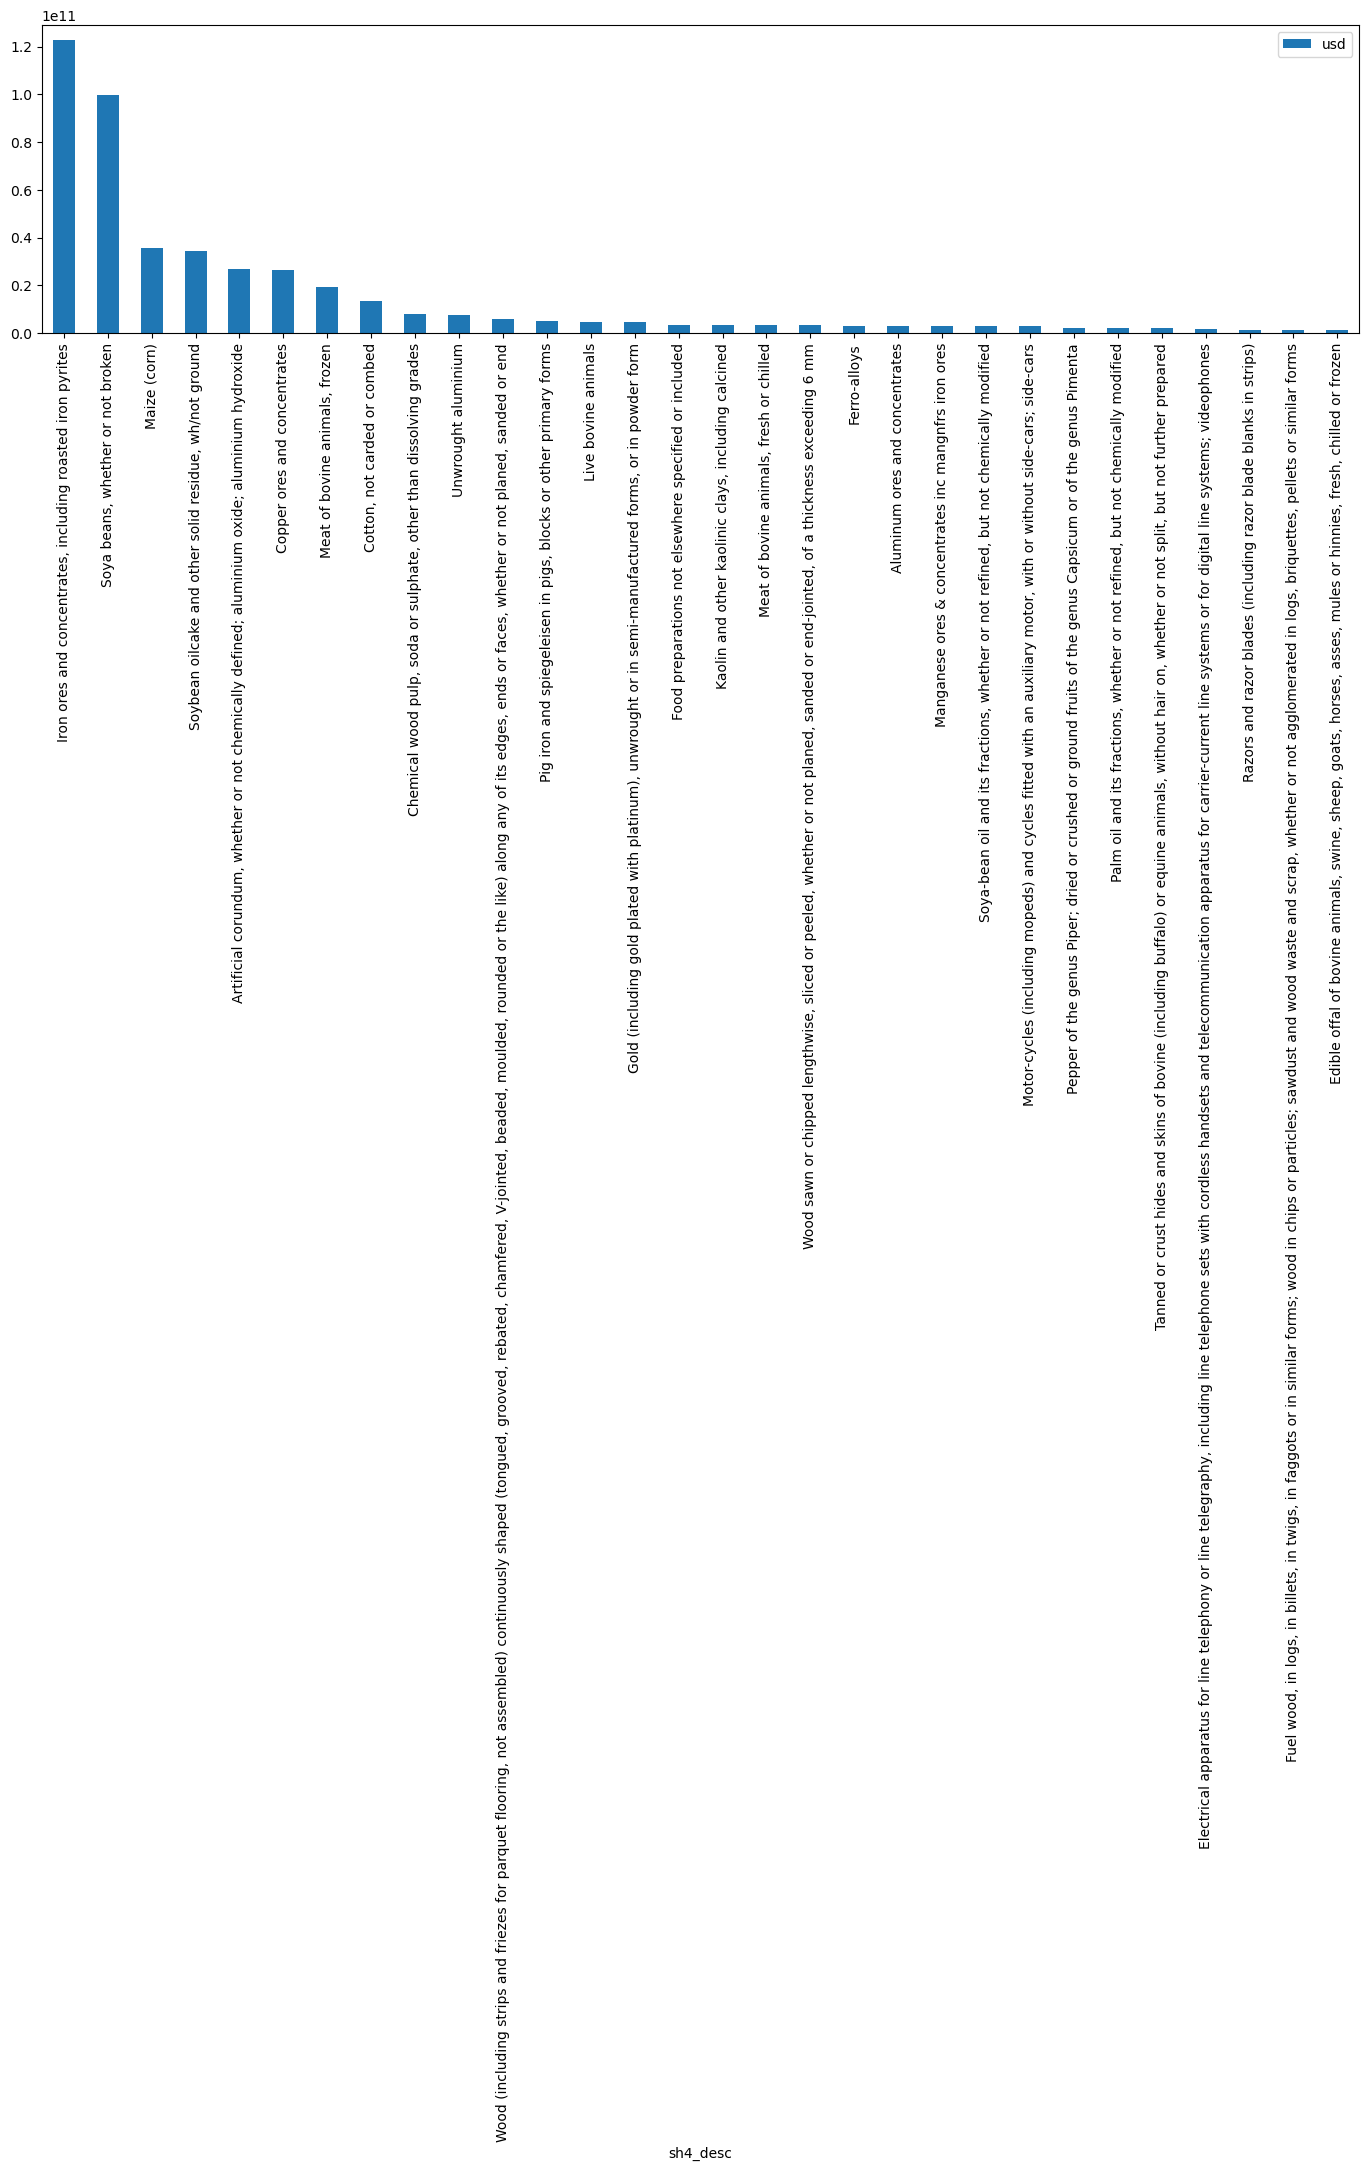

In [28]:
# most imported products by usd
plot_product_types(df=df, p_code="sh4_desc", y="usd", n_values=30)

## codigo de produtos: sh2

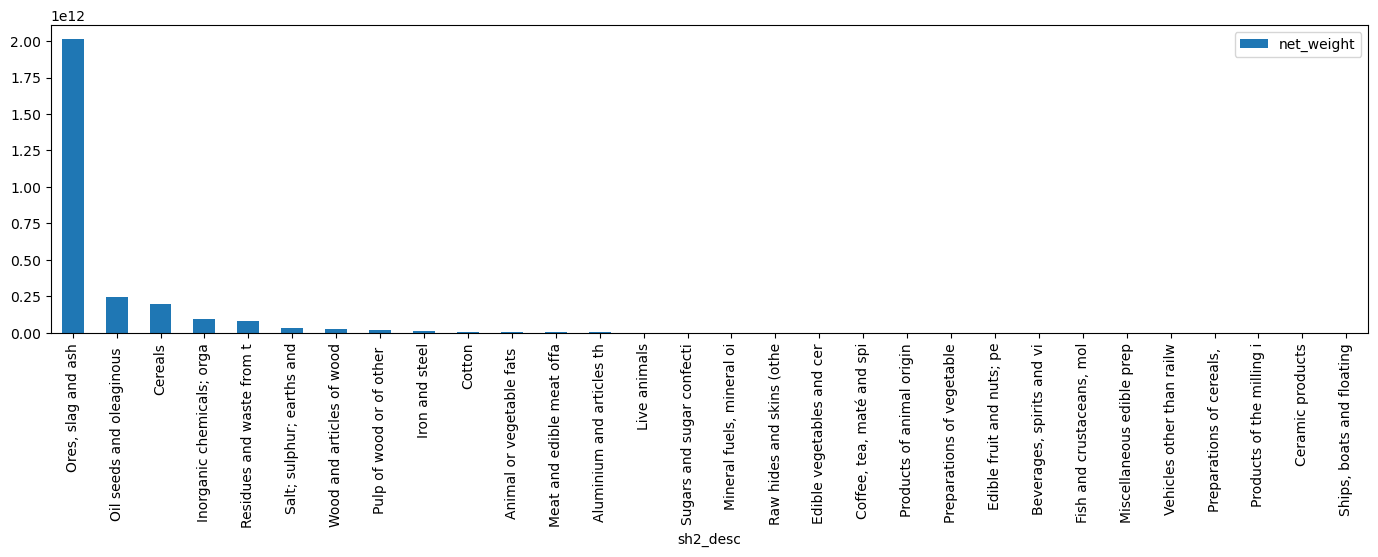

In [29]:
# most imported products by weight (code: sh2)
plot_product_types(df=df, p_code="sh2_desc", y="net_weight", n_values=30)

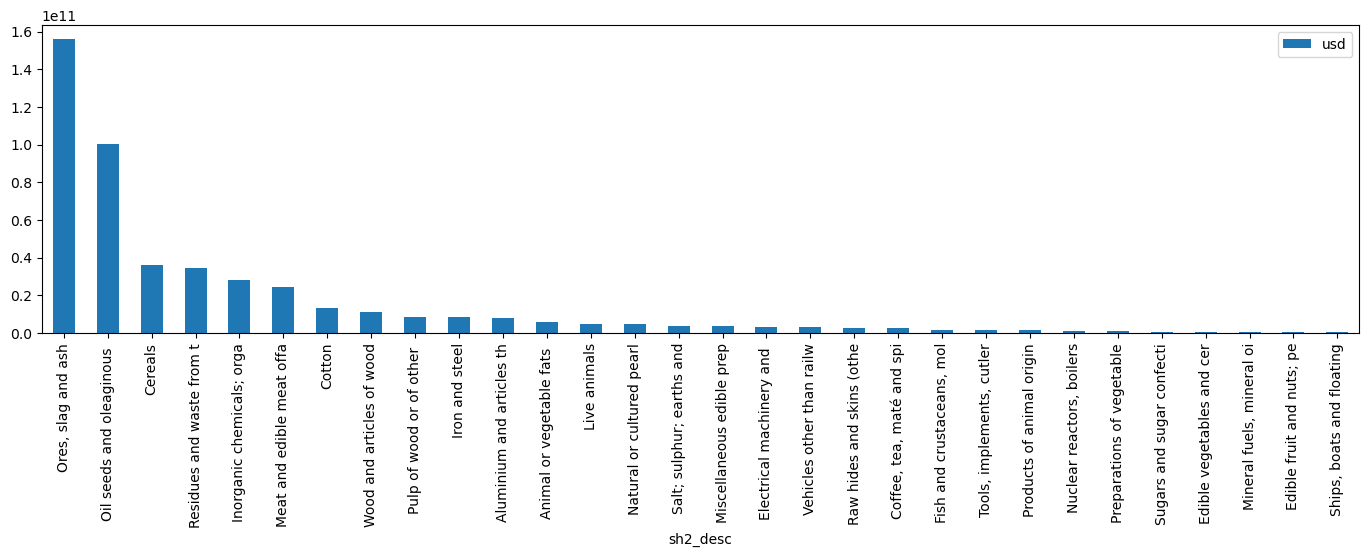

In [30]:
# most imported products by usd (code: sh2)
plot_product_types(df=df, p_code="sh2_desc", y="usd", n_values=30)

In [45]:
# separar em impactos: baixo, medio, alto
df.sh2_desc.value_counts().index

Index(['Wood and articles of wood', 'Meat and edible meat offa', 'Cereals',
       'Oil seeds and oleaginous ', 'Electrical machinery and ',
       'Edible vegetables and cer', 'Edible fruit and nuts; pe',
       'Fish and crustaceans, mol', 'Cotton', 'Nuclear reactors, boilers',
       'Preparations of vegetable', 'Plastics and articles the',
       'Animal or vegetable fats ', 'Dairy produce; birds' egg',
       'Beverages, spirits and vi', 'Miscellaneous edible prep',
       'Coffee, tea, maté and spi', 'Raw hides and skins (othe',
       'Ores, slag and ash', 'Residues and waste from t',
       'Articles of iron or steel', 'Tools, implements, cutler',
       'Products of animal origin', 'Furniture; bedding, mattr',
       'Preparations of cereals, ', 'Miscellaneous manufacture',
       'Salt; sulphur; earths and', 'Products of the milling i',
       'Optical, photographic, ci', 'Preparations of meat, of ',
       'Special operations', 'Vehicles other than railw',
       'Essential 

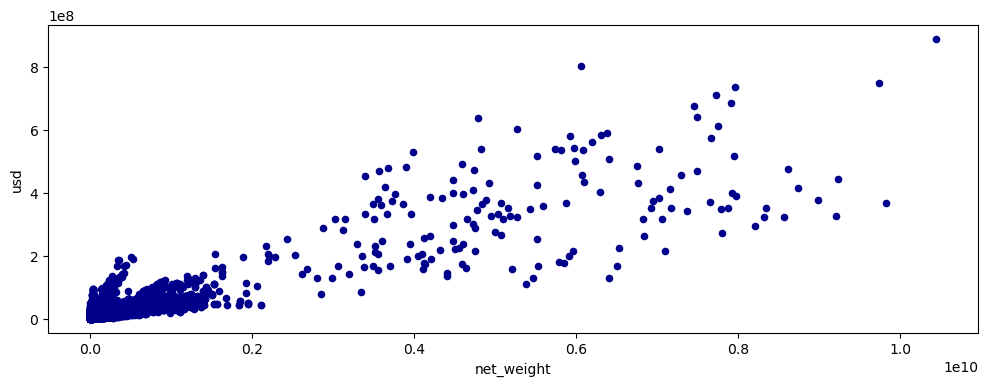

In [31]:
# aqui conseguimos visualizar a correlacao entre as exportacoes em usd e peso de produto
ax1 = df.plot.scatter(x='net_weight',
                      y='usd',
                      c='DarkBlue', figsize=(12, 4))

plt.show()

In [32]:
df.head()

,year,month,country,city,sh4_code,sh4_desc,sh2_code,sh2_desc,economic_block,usd,net_weight,Nome_Município,estado,Código Município Completo
0,2010,1,Albania,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spi",Europe,39750,15000,Castanhal,PA,1502400.0
1,2010,1,Algeria,Araguaína - TO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offa,Africa (minus MIDDLE EAST),1250675,395681,Araguaína,TO,1702109.0
2,2010,1,Algeria,Castanhal - PA,904,Pepper of the genus Piper; dried or crushed or...,9,"Coffee, tea, maté and spi",Africa (minus MIDDLE EAST),74103,28000,Castanhal,PA,1502400.0
3,2010,1,Algeria,Vilhena - RO,202,"Meat of bovine animals, frozen",2,Meat and edible meat offa,Africa (minus MIDDLE EAST),351563,125064,Vilhena,RO,1100304.0
4,2010,1,Angola,Ariquemes - RO,9406,Prefabricated buildings,94,"Furniture; bedding, mattr",Africa (minus MIDDLE EAST),50000,37600,Ariquemes,RO,1100023.0


In [33]:
print("""O sh4_code possui {} valores diferentes, contanto que o sh2_code possui {} valores diferentes. Assim,
podemos concluir que o sh2_code é mais generalizado""".format(len(df['sh4_code'].unique()), len(df['sh2_code'].unique())))

O sh4_code possui 1008 valores diferentes, contanto que o sh2_code possui 96 valores diferentes. Assim,
podemos concluir que o sh2_code é mais generalizado


# Municipios que mais exportam

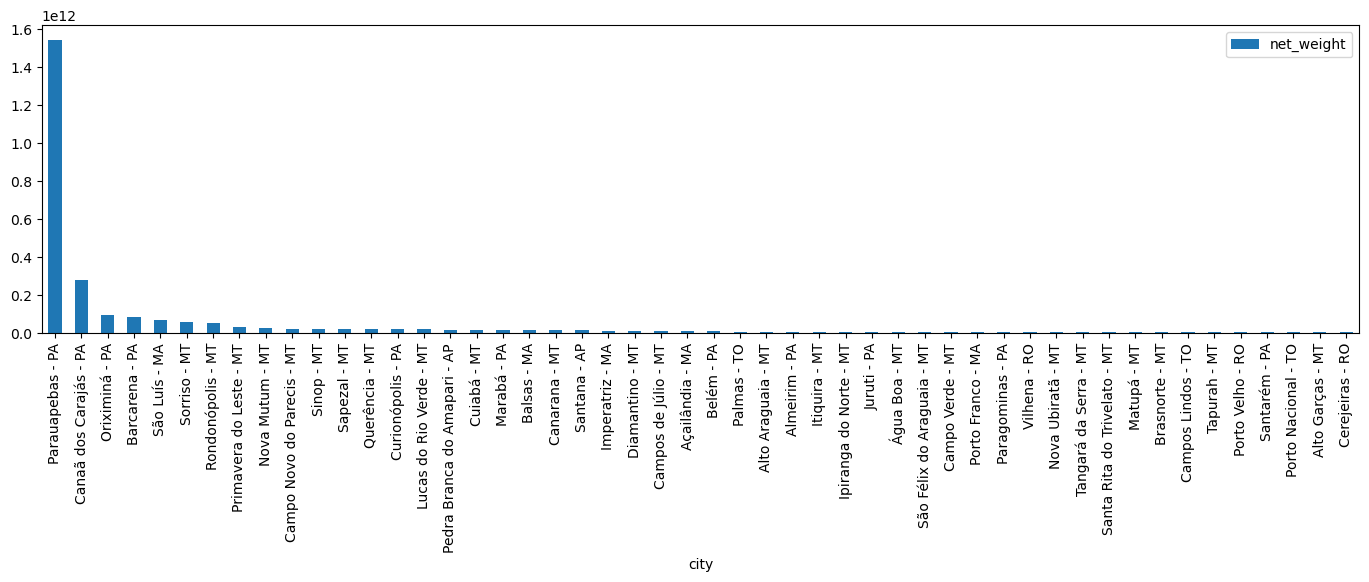

In [34]:
# in weight of product
plot_product_types(df=df, p_code="city", y="net_weight", n_values=50)

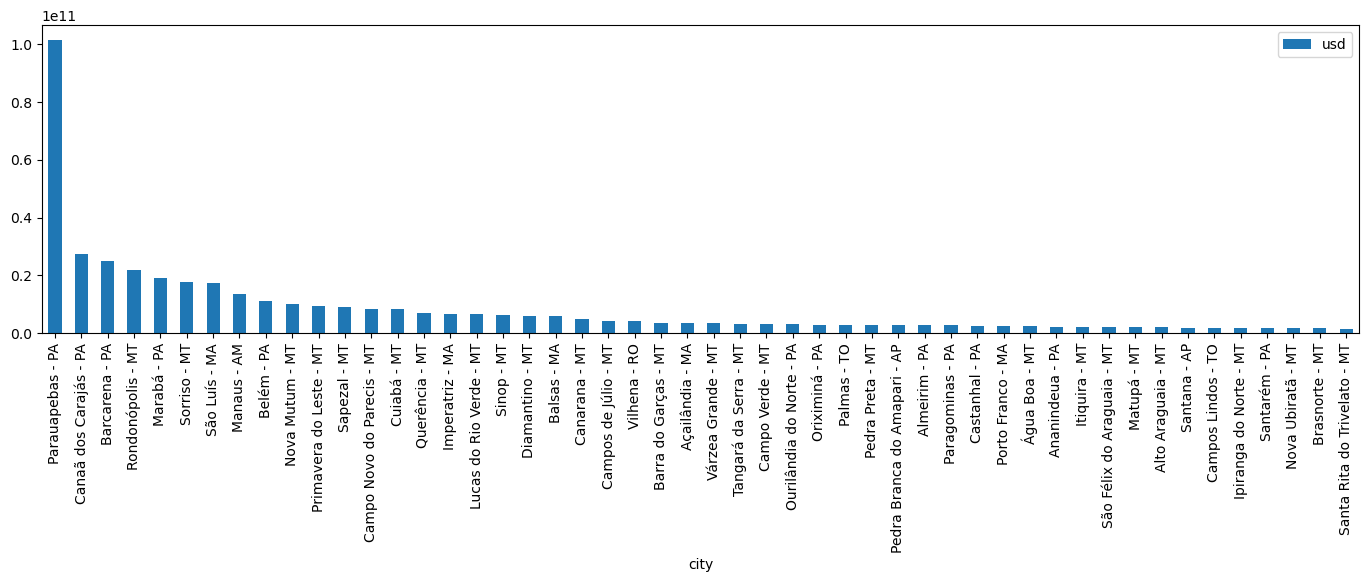

In [35]:
# in usd
plot_product_types(df=df, p_code="city", y="usd", n_values=50)

# Quais produtos exportam os municipios que mais exportam?

In [36]:
# primeiramente, aqui temos uma lista com os municipios que mais exportaram
list(df.groupby(by=["city"]).sum().sort_values(by=["usd"], ascending=False).reset_index(level=0).head(20).city.values)

['Parauapebas - PA',
 'Canaã dos Carajás - PA',
 'Barcarena - PA',
 'Rondonópolis - MT',
 'Marabá - PA',
 'Sorriso - MT',
 'São Luís - MA',
 'Manaus - AM',
 'Belém - PA',
 'Nova Mutum - MT',
 'Primavera do Leste - MT',
 'Sapezal - MT',
 'Campo Novo do Parecis - MT',
 'Cuiabá - MT',
 'Querência - MT',
 'Imperatriz - MA',
 'Lucas do Rio Verde - MT',
 'Sinop - MT',
 'Diamantino - MT',
 'Balsas - MA']

In [37]:
def plot_product_types_mun(df=df, p_code="sh2_desc", city="Parauapebas - PA", y="net_weight", n_values=20):
    '''
    This function plots the quantity of imported products in usd or weight by municipality
    city - just enter the name of the municipality, for instante: Parauapebas - PA
    '''
    # let's cut the desc columns, so the visuals look cleaner
    df.loc[:, ['sh4_desc']] = df['sh4_desc'].apply(lambda x: x[:25])
    df.loc[:, ['sh2_desc']] = df['sh2_desc'].apply(lambda x: x[:25])
    df = df.query("city == city")
    
    # here we define and order the values we want to plot
    imp_w = df.groupby(by=[p_code]).sum().sort_values(by=[y], ascending=False).reset_index(level=0).head(n_values)
    # then we plot them
    ax = imp_w.plot(x=p_code, y=y, kind="bar", figsize=(17, 4))

    plt.show()

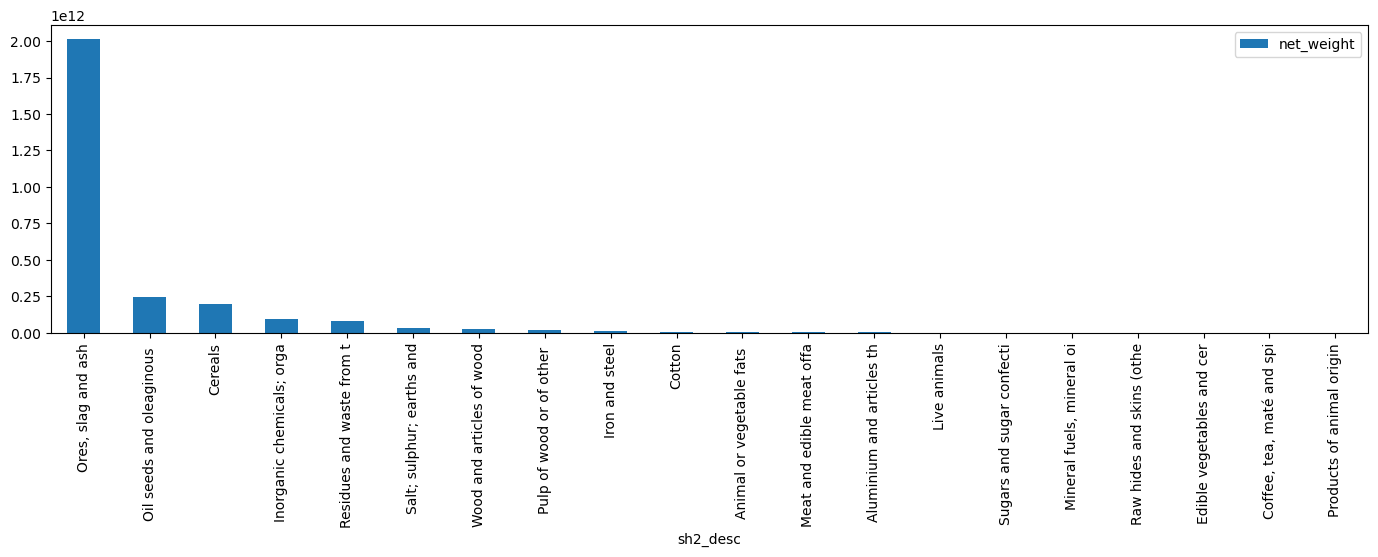

In [38]:
plot_product_types_mun(df=df, p_code="sh2_desc", city="Parauapebas - PA", y="net_weight", n_values=20)

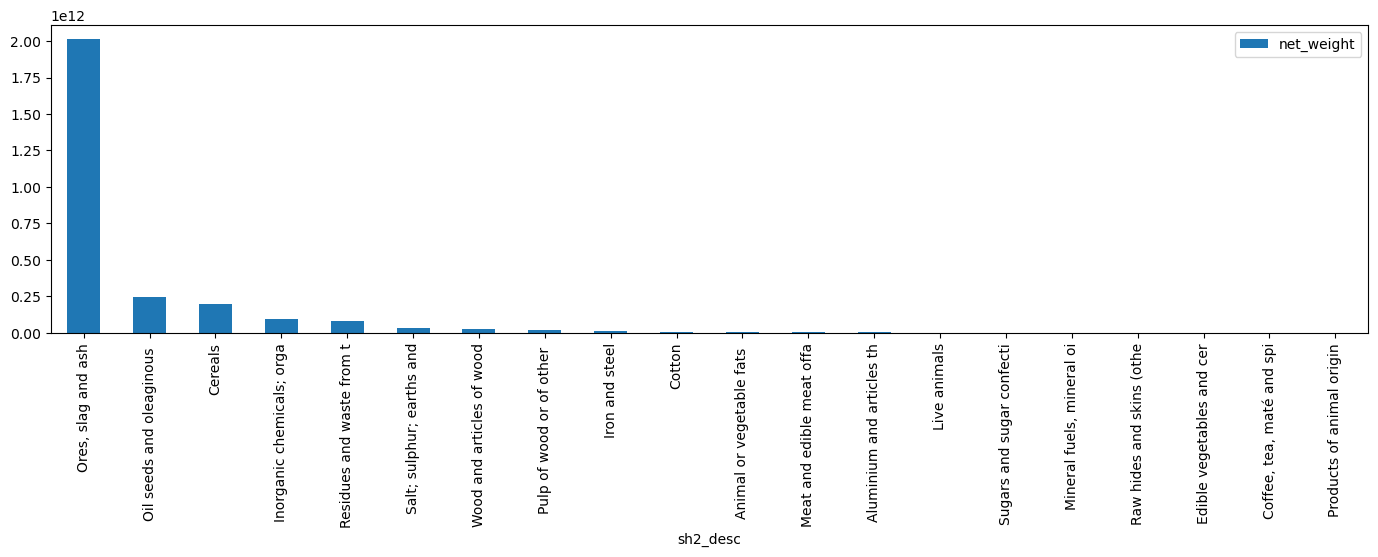

In [39]:
plot_product_types_mun(df=df, p_code="sh2_desc", city="Canaã dos Carajás - PA", y="net_weight", n_values=20)

Podemos observar que os 3 municipios que mais exportam sao municipios que exportam minerio, o segundo produto mais exportado eh graos, terceiro cereais

# Valor gerado dos itens exportados

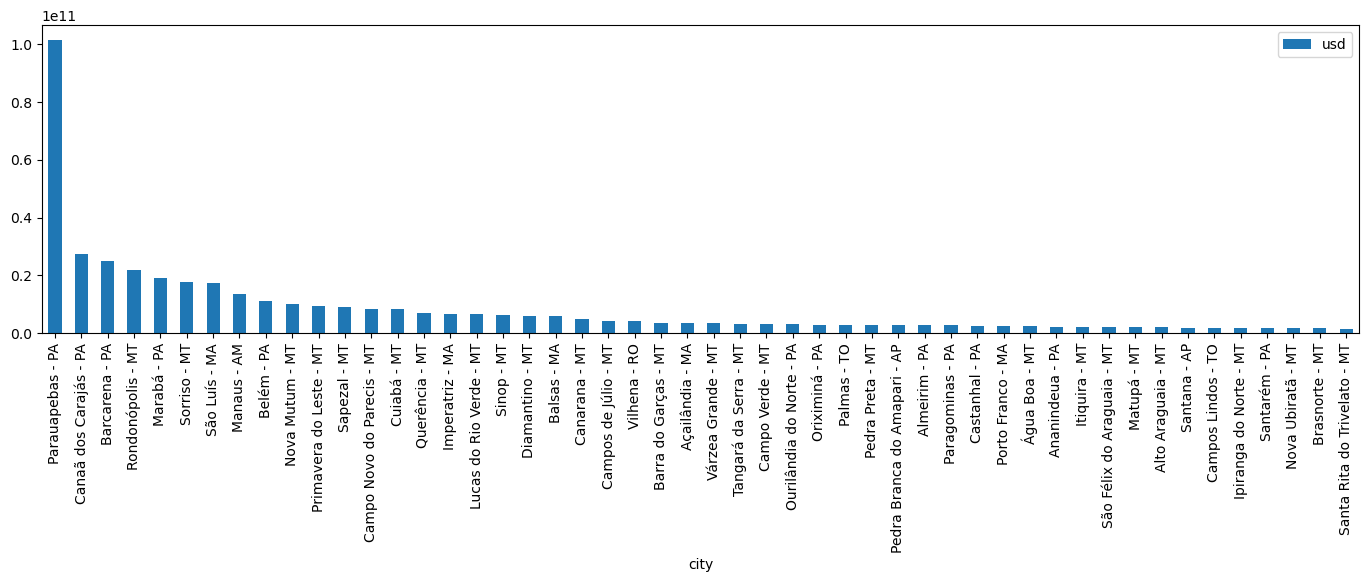

In [40]:
plot_product_types(df=df, p_code="city", y="usd", n_values=50)